In [1]:
# Fill in your name using the format below and student ID number
your_name = "Aljabasini, Obada"
student_id = "1457136"
print("I changed the template file a bit because in the last question we were expected to modify X_train directly (not copy it but overrite it), so i just changed the name of the variable to make it sensible e.g. X_train -> X_train_emb")
print("Apologies for exceeding the characters limit but I did not manage to make it shorter Also, please do check the references at the end of this notebook because they are cited in the answers.")

I changed the template file a bit because in the last question we were expected to modify X_train directly (not copy it but overrite it), so i just changed the name of the variable to make it sensible e.g. X_train -> X_train_emb
Apologies for exceeding the characters limit but I did not manage to make it shorter Also, please do check the references at the end of this notebook because they are cited in the answers.


In [6]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [7]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml

In [8]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
import sklearn

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)
sklearn_version = sklearn.__version__
tf.config.experimental.list_physical_devices("GPU")  # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import openml as oml
import sklearn

In [10]:
import sklearn
import tensorflow
from packaging import version

tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print(
        "Tensorflow is outdated. This is version {}. Please update to 2.1.".format(
            tensorflow_version
        )
    )
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Obada, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [11]:
# base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
base_dir = "./models"

In [12]:
# Uncomment to link Colab notebook to Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [13]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
# import os
# oml.config.cache_directory = os.path.expanduser('/content/cache')

In [14]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format="array", target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [15]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X), 32, 32, 3))
Xr = Xr / 255.0
yr = to_categorical(y)

In [16]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split

# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(
    Xr, yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_all, y_train_all, stratify=y_train_all, train_size=0.8, random_state=1
)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

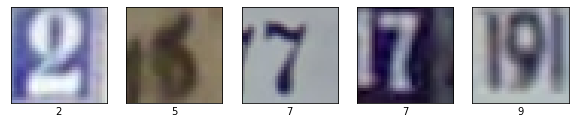

In [17]:
from random import randint


# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X), figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap="gray")
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n]) + 1) % 10)  # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show()


images = [randint(0, len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [18]:
import os
import pickle

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import load_model  # for use with tensorflow
from tensorflow.keras.optimizers import Adam, Nadam


def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose > 0:
        print("\033[91m" + text + "\x1b[0m")


def load_model_from_file(base_dir, name, extension=".h5"):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name + extension))
    except OSError:
        shout(
            "Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?"
        )
        return False
    return model


def save_model_to_file(model, base_dir, name, extension=".h5"):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name + extension))


# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=["min", "max"], data=[x.min(), x.max()])


# DO NOT EDIT
def run_evaluation(
    name,
    model_builder,
    data,
    base_dir,
    train=True,
    generator=False,
    epochs=3,
    batch_size=32,
    steps_per_epoch=60,
    verbose=1,
    **kwargs
):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, "fit"):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training:  # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(
                generator,
                epochs=epochs,
                steps_per_epoch=steps_per_epoch,
                verbose=1,
                validation_data=(X_val, y_val),
            )
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(
                X_train,
                y_train,
                epochs=epochs,
                batch_size=batch_size,
                verbose=1,
                validation_data=(X_val, y_val),
            )
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name + ".p"), "wb") as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in " + base_dir, verbose)
    else:  # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(
                open(os.path.join(base_dir, name + ".p"), "rb")
            )
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2, style=["b:", "r:", "b-", "r-"])
    plt.xlabel("epochs")
    print(lc.apply(minMax))

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233118  0.186154  2.232712      0.190974
max  2.266019  0.190954  2.238847      0.190974


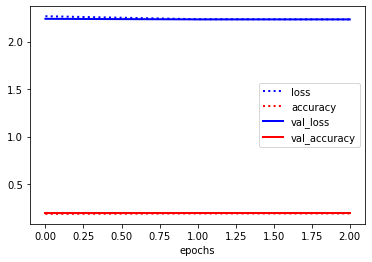

In [19]:
# Toy usage example
# Remove before submission
from tensorflow.keras import layers, models


def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32, 32, 3)))
    model.add(layers.Dense(10, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(
        optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model


# First build and store
run_evaluation(
    "toy_example",
    build_toy_model,
    evaluation_split,
    base_dir,
    train=True,
    epochs=3,
    batch_size=128,
)

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233118  0.186154  2.232712      0.190974
max  2.266019  0.190954  2.238847      0.190974


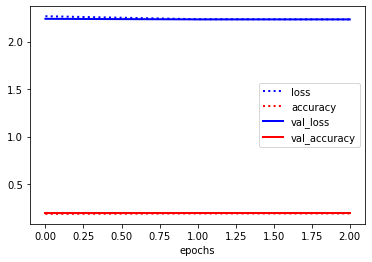

In [20]:
# Toy usage example
# Remove before submission
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, train=False)

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

In [21]:
import tensorflow as tf
from tensorflow.keras.activations import selu, relu
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam, Nadam
# import ktrain 
# from kerastuner.tuners import Hyperband


# def build_model_select(hp):
#     base_size = hp.Int("base_size", min_value=64, max_value=512, step=64)
#     model = models.Sequential()
#     model.add(layers.Reshape((32 * 32 * 3,), input_shape=(32, 32, 3)))
#     init = he_normal(seed=32)
#     hidden_layers = 3
#     for i in range(hidden_layers):
#         size = base_size // (2 ** i)
#         model.add(layers.Dense(units=hp.Int(f"units-{i}",
#                                                 min_value=size // 2,
#                                                 max_value=size,
#                                                 step=64),
#                                    kernel_initializer=init,
#                                    activation = hp.Choice(f"activation-{i}", values=["selu", "relu"]) )
#         )
#         model.add(tf.keras.layers.Activation(hp.Choice(
#                                                     f"activation-{i}",
#                                                     values=[selu, relu])
#                 )
#         )
#     model.add(layers.Dense(10, activation="softmax"))
#     opt = Nadam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999)
#     model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
#     return model

def build_model_1_1(base_size=512, activation=selu, initial_lr=1e-3):
    model = models.Sequential()
    model.add(layers.Reshape((32 * 32 * 3,), input_shape=(32, 32, 3)))
    init = he_normal(seed=32)
    hidden_layers = 3
    for i in range(hidden_layers):
        size = base_size // (2 ** i)
        model.add(layers.Dense(size, kernel_initializer=init))
        model.add(tf.keras.layers.Activation(activation))
    model.add(layers.Dense(10, activation="softmax"))
    opt = Nadam(learning_rate=initial_lr, beta_1=0.9, beta_2=0.999)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    return model



X_train, X_val, y_train, y_val = evaluation_split
base_size = 192
# tuner = Hyperband(
#     build_model_select,
#     objective='val_accuracy',
#     directory='my_dir',
#     overwrite=True,
#     max_epochs=40
# )
# tuner.search(X_train, y_train,
#              epochs=5,
#              verbose=0,
#              validation_data=(X_val, y_val))
# model = tuner.get_best_models(num_models=1)
# print(model)
# model = build_model_1_1(base_size)
# learner = ktrain.get_learner(model, train_data=(X_train, y_train), val_data = (X_val, y_val))
# learner.lr_find(stop_factor=20, max_epochs=10)
# learner.lr_plot()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 192)               590016    
_________________________________________________________________
activation_9 (Activation)    (None, 192)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 96)                18528     
_________________________________________________________________
activation_10 (Activation)   (None, 96)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 48)                4656      
_________________________________________________________________
activation_11 (Activation)   (None, 48)               

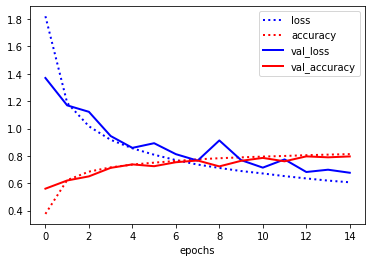

In [22]:
run_evaluation(
    "model_1_1",
    build_model_1_1,
    evaluation_split,
    base_dir,
    train=True,
    epochs=15,
    batch_size=32,
    base_size=base_size,
    initial_lr=4e-3,
    verbose=0
)
answer_q_1_1 = """
To start off, I experimented with some commonly used value in literature(128, 256, 512), I immediately noticed that the model with 512 nodes in the
first layer is overfitting, and it seemed that a value between 128 and 256 seems to be more reasonable.
Then, I had to fine-tune my hyperparameter and had two choices: tuning my learning rate and fixing the batch size(what is usually done) or try to 
fine-tune both(as suggested in [1], where they suggested increasing the batch size instead of decaying the learning rate).
I chose the former and fixed the batch size(32). Next, I used the Hyperband algorithm to choose the hyperparameters namely the number of neurons in the first
layer(from 64 to 512 with step 64, the best value was actually 192 as expected) and the activation function(I started by trying swish[2], which is a 'general' 
replacement of ReLU and actually gave a better performance but unforuntatley is not in the stable branch of TF, SELU and ReLU activation functions were tried next
and, unsurprisngly, SELU yielded a better model due to its ability to perform self-normalization).
In contrast, the learning rate was chosen using cyclical learning rate[3], and although it was kind of strange that the resulting plot was kind of flat, 
the value for which the loss decreased significantly was chosen(nearly 4e-3 which is actually quite common 'citing Karpathy :)' ).
Finally, the He's initialization method[4] was used to initialize the weight of the layers which increased the accuracy by approximately 0.5%, Nadam was also used
due to its ability to deal with a wide range of optimization problems effectively.
In the end, the training, validation, testing accuracies were all nearly 79% which is actually a very good result for a simple fully-connected network.
"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

In [23]:
model = load_model_from_file(base_dir, "model_1_1")
print(model.evaluate(X_test, y_test))

621/621 [==============================] - 2s 3ms/step - loss: 0.6728 - accuracy: 0.7962
[0.6727571487426758, 0.7962030172348022]


### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [24]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [25]:
from tensorflow.keras.activations import selu
# import ktrain
# Replace with the preprocessed data
X1, X2 = rgb2gray(X_train), rgb2gray(X_val)
preprocessed_split = X1, X2, y_train, y_val
# Adjusted model
def build_model_1_2(base_size=512, activation=selu, initial_lr=1e-3):
    model = models.Sequential()
    # just for clarity
    model.add(layers.Reshape((32 * 32 * 1,), input_shape=(32, 32, 1)))
    init = he_normal(seed=32)
    hidden_layers = 3
    for i in range(hidden_layers):
        size = base_size // (2 ** i)
        model.add(layers.Dense(size, kernel_initializer=init))
        model.add(tf.keras.layers.Activation(activation))
    model.add(layers.Dense(10, activation="softmax"))
    opt = Nadam(learning_rate=initial_lr, beta_1=0.9, beta_2=0.999)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    return model


base_size = 192
# model = build_model_1_2(base_size)
# learner = ktrain.get_learner(model, train_data=(X1, y_train), val_data = (X2, y_val))
# learner.lr_find(max_epochs=5)
# learner.lr_plot()

Loading model from file
Success!
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_9 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 192)               196800    
_________________________________________________________________
activation_28 (Activation)   (None, 192)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 96)                18528     
_________________________________________________________________
activation_29 (Activation)   (None, 96)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 48)                4656      
_________________________________________________________________
activation_30 (Activa

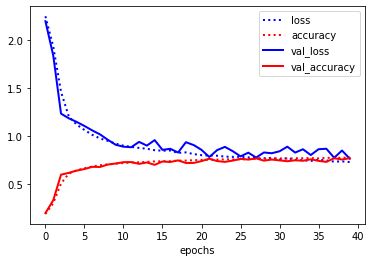

In [26]:
run_evaluation(
    "model_1_2",
    build_model_1_2,
    preprocessed_split,
    base_dir,
    train=True,
    epochs=40,
    batch_size=32,
    base_size=base_size,
    initial_lr=4e-3,
)
answer_q_1_2 = """
The model is actually rather worsw which is unexpected as color has no effect on recognizing the street view numbers. However, the previous model was overfitting the
data a little bit and now it fits the data perfectly so one would safely increase the number of epochs. I suspect that by decreasing the number of channels to 1,
we decreased the number of the parameters and hence the model did not overfit. Also, the training procedure were faster and I would argue that ]of the model being 
more robust to lighting conditions and decreasing the training time at the expense of sacrificing 1% of the accuracy(nearly 78%) is worth it.
"""
print("Answer is {} characters long".format(len(answer_q_1_2)))

In [27]:
model = load_model_from_file(base_dir, "model_1_2")
print(model.evaluate(rgb2gray(X_test), y_test))

621/621 [==============================] - 2s 2ms/step - loss: 0.7715 - accuracy: 0.7741
[0.7715473771095276, 0.7741464376449585]


### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.activations import selu
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.layers import Activation, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam, Nadam
# import ktrain

def build_model_1_3(base_size=512, activation=selu, initial_lr=1e-3):
    model = models.Sequential()
    model.add(layers.Reshape((32 * 32 * 1,), input_shape=(32, 32, 1)))
    init = he_normal(seed=32)
    hidden_layers = 3
    for i in range(hidden_layers):
        size = base_size // (2 ** i)
        model.add(layers.Dense(size, kernel_initializer=init))
        model.add(tf.keras.layers.Activation(activation))
    model.add(Dropout(0.1))
    model.add(layers.Dense(10, activation="softmax"))
    opt = Nadam(learning_rate=initial_lr, beta_1=0.9, beta_2=0.999)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    return model


base_size = 192
# model = build_model_1_3(base_size)
# learner = ktrain.get_learner(model, train_data=(X1, y_train), val_data = (X2, y_val))
# learner.lr_find(max_epochs=5)
# learner.lr_plot()

Loading model from file
Success!
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_27 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_187 (Dense)            (None, 192)               196800    
_________________________________________________________________
activation_174 (Activation)  (None, 192)               0         
_________________________________________________________________
dense_188 (Dense)            (None, 96)                18528     
_________________________________________________________________
activation_175 (Activation)  (None, 96)                0         
_________________________________________________________________
dense_189 (Dense)            (None, 48)                4656      
_________________________________________________________________
activation_176 (Acti

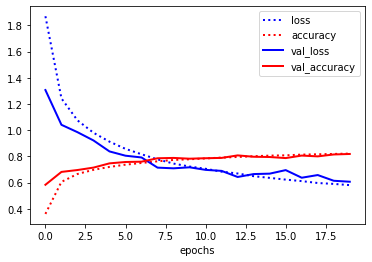

In [29]:
run_evaluation(
    "model_1_3",
    build_model_1_3,
    preprocessed_split,
    base_dir,
    train=True,
    epochs=20,
    batch_size=32,
    base_size=base_size,
    initial_lr=4e-4,
)
answer_q_1_3 = """
We do not need to explore much here as we could expect now how changing the hyperparameter would affect the results.
To regularize the model, a natural way to start would be to use a Dropout layer, we should be very careful here not to overregularize because the previous model was
already fitting the data well enough(the p in the Dropout layer should be very small). In addition, the loss function here seems to be more 'wiggly', 
decreasing the learning rate to 4e-4 yielded a much better result(which is to be expected as the learning rate could be perceived as a regularization parameter, so it 
is not far-fetch to expect that making it smaller will make our model better in this case), the model also naturally fits the data very well. 
Note that we do not have to use l2-regularization as early stopping has the same effect.
The new regularized model outperformed the preivous models and the accuracy was nearly 82% which is expectionally good for such a network.
"""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.activations import selu
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.layers import (
    Activation,
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D,
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Nadam
# import ktrain

# inspired by vgg-19
def build_model_2_1_exper(initial_lr=4e-3):
    model = Sequential()
    # block 1
    model.add(
        Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 1))
    )
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    # block 2
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    # block 3
    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    # block 4
    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    # fcs
    model.add(Flatten())
    # fc 1
    model.add(Dense(2048, activation="relu"))
    model.add(BatchNormalization())
    # fc 2
    model.add(Dense(2048, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    # output
    model.add(Dense(10, activation="softmax"))
    opt = Nadam(learning_rate=initial_lr, beta_1=0.9, beta_2=0.999)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    return model


def add_conv_block(model, size, kernel_size, pooling_size, activation, dropout=None, inp=False):
    temp = (kernel_size, kernel_size)
    if inp:
        model.add(Conv2D(size, temp, padding="same", input_shape=(32, 32, 1)))
    else:
        model.add(Conv2D(size, temp, padding="same"))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(Conv2D(size, temp, padding="same"))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    if dropout is not None:
        model.add(Dropout(dropout))


def add_dense_block(model, size, activation, include_bn=True, dropout=None):
    model.add(Dense(256))
    model.add(Activation(activation))
    if include_bn:
        model.add(BatchNormalization())
    if dropout is not None:
        model.add(Dropout(dropout))


def build_model_2_1(
    initial_lr=4e-3,
    conv_blocks=3,
    conv_size=32,
    kernel_size=3,
    pooling_size=2,
    dense_blocks=2,
    dense_size=512,
    conv_activation=selu,
    dense_activation=selu,
    use_dropout=True,
):
    model = Sequential()
    for i in range(1, conv_blocks + 1):
        dropout = 0.0 + 0.1 * i if use_dropout else None
        t = conv_size * (2 ** (i - 1))
        add_conv_block(model, t, kernel_size, pooling_size, conv_activation, dropout, (i == 1))
    model.add(Flatten())
    dense_dropout = 0.3
    for i in range(1, dense_blocks + 1):
        add_dense_block(model, dense_size, dense_activation, include_bn=False, dropout=dense_dropout if i == dense_blocks and use_dropout else None)
    model.add(Dense(10, activation="softmax"))
    opt = Nadam(learning_rate=initial_lr, beta_1=0.9, beta_2=0.999)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    return model

conv_blocks = 4
conv_size = 32
kernel_size = 3
dense_blocks = 2
dense_size = 512
# model = build_model_2_1(conv_blocks=conv_blocks)
# learner = ktrain.get_learner(model, train_data=(X1, y_train), val_data = (X2, y_val))
# learner.lr_find(max_epochs=5)
# learner.lr_plot()

Loading model from file
Success!
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
activation_132 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_133 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_20 (Ma

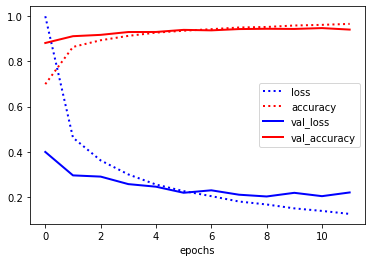

In [31]:
run_evaluation(
    "model_2_1",
    build_model_2_1,
    preprocessed_split,
    base_dir,
    train=True,
    epochs=10,
    batch_size=32,
    initial_lr=4e-4,
    conv_blocks=conv_blocks,
    conv_size=conv_size,
    kernel_size=kernel_size,
    dense_blocks=dense_blocks,
    dense_size=dense_size,
)
answer_q_2_1 = """
It is hard to use keras-tuner here as the training time is already large for a single model.
Designing a CNN is not a trivial task as many decision should be made(the number of kernels, the size of the kernel, the order of the layers(there is actually a debate
about the order of the BN layer and the Dropout layer) etc.). Hence, one should not try to be a 'hero'(citing Karpathy again) and should first try the typical CNN
architectures as there is a good chance one of them(depeneding on the complexity of the problem) will work. For this dataset, WideResNet seems to be state-of-the-art[5],
but we cannot mimic such architecture due to resources constraints. We will try to mimic sth between VGG-16 and VGG-19 as shown in the code, the model will have 4
convolutional blocks and 2 dense layers and the activation functions are the SELU function again. VGG-19 was tried but it simply overfitted the data while the VGG-16
seemed to underfit the data. The learning rate was once again chosen using the method in [3], a combination of dropout layers with increasing amount and BN layers
(other normalization techniques like instance normalization cannot be used because the number of the channels is 1) were used to regularize and improve the 
performance of the model, the resulting accuracy was nearly 94% and the model slightly overfits the data.
"""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
activation_164 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_66 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_165 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_67 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_33 (Ma

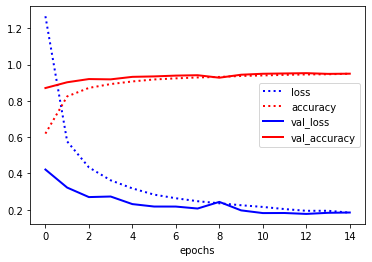

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X1, _, _, _ = preprocessed_split
batch_size = 32
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X1)
it = datagen.flow(X1, y_train, batch_size=batch_size)
augmented_split = (it, X2, y_val)
run_evaluation(
    "model_2_2",
    build_model_2_1,
    augmented_split,
    base_dir,
    train=True,
    generator=True,
    epochs=15,
    batch_size=None,
    steps_per_epoch=X1.shape[0] // batch_size,
    initial_lr=4e-4,
    conv_blocks=conv_blocks,
    conv_size=conv_size,
    kernel_size=kernel_size,
    dense_blocks=dense_blocks,
    dense_size=dense_size,
)
answer_q_2_2 = """
We are quite limited in which data augmentation transformation we could use due to the small size of the samples, using anything besides shifting will make 
the sample corrupt(the numbers are not centered in the images, so zooming into the image might result in blanck image). In additon, flipping the images might
also 'confuse' the CNN as flipping '2' might result in something similiar to '5', so we will only use shifting transformation(normalizing the images using
samplewise_center=True and similiar centring methods did not improve the performance of the model). The resulting accuray was 95%(which is to be expected as
our previous model was already fitting the data well and did not need anything significant) and the model fits the data perfectly.
Note: I trid to use the autoaugment algorithm to automatically learn the best transformation but it did not work out well with keras.
"""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

A sample from the test data(to check how the labeling is done):
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
621/621 [==============================] - 5s 8ms/step - loss: 0.1898 - accuracy: 0.9480
test accuracy=0.9479806423187256


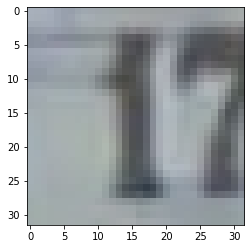

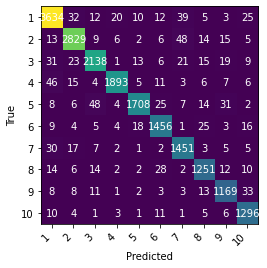

(118, 32, 32, 3)


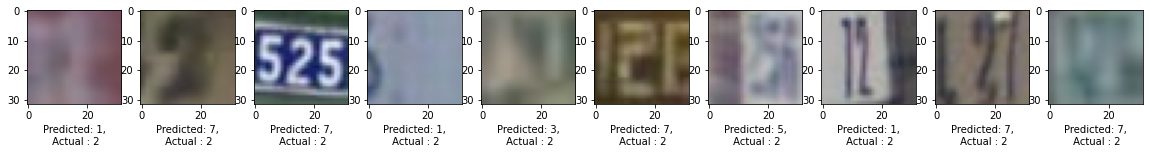

Answer is 1869 characters long


In [39]:
# from tensorflow.keras.utils import get_custom_objects
# get_custom_objects().update({'swish': keras.layers.Activation(tf.nn.swish)})
# get_custom_objects().update({'selu': keras.layers.Activation(tf.nn.selu)})

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix():
    model = load_model_from_file(base_dir, "model_2_2")
    X3 = rgb2gray(X_test)
    y_pred = model.predict(X3)
    actual = np.argmax(y_test, axis=1)
    predicted = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(actual, predicted)
    fig, ax = plt.subplots()
    im = ax.imshow(cm)
    r = np.arange(10)
    rr = np.arange(1, 11)
    ax.set_xticks(r), ax.set_yticks(r)
    ax.set_xticklabels(list(rr), rotation=45, ha="right")
    ax.set_yticklabels(list(rr))
    ax.set_ylabel("True")
    ax.set_xlabel("Predicted")
    for i in range(100):
        ax.text(
            int(i // 10),
            i % 10,
            cm[i % 10, int(i // 10)],
            ha="center",
            va="center",
            color="w",
        )
    plt.show()


def plot_misclassifications(number=2, show=10):
    model = load_model_from_file(base_dir, "model_2_2")
    X3 = rgb2gray(X_test)
    y_pred = model.predict(X3)
    actual = np.argmax(y_test, axis=1)
    predicted = np.argmax(y_pred, axis=1)
    index = (actual == number - 1)
    X = X_test[index]
    actual = actual[index]
    predicted = predicted[index]
    index = (actual != predicted)
    X = X[index]
    predicted = predicted[index]
    print(X.shape)
    fig, axes = plt.subplots(1, show, figsize=(20, 15))
    for i in range(show):
        x = X[i]
        x = np.squeeze(x)
        axes[i].imshow(x)
        axes[i].set_xlabel(f"Predicted: {predicted[i] + 1},\n Actual : {number}")
    plt.show()

print("A sample from the test data(to check how the labeling is done):")
print(y_test[2])
plt.imshow(np.squeeze(X_test[2]))

model = load_model_from_file(base_dir, "model_2_2")
X3 = rgb2gray(X_test)
test_loss, test_accuracy_3_1 = model.evaluate(X3, y_test)
print(f"test accuracy={test_accuracy_3_1}")
plot_confusion_matrix()
plot_misclassifications()


answer_q_3_1 = """
First, we should note that actually the data is actually labeled in a strange way, the label '1' correspond to the first item in the y, check the example where the 
label and the corresponding image was shown, clearly the image contains the number '1' but the corresponding entry is [1, 0, 0, ...] in opposition to one would expect
[0, 1, 0, ..], so we should carefully map the labels with the indices.
Appearently, one could easily notice from the confusion matrix that '2' and '7' are often confused(we will check this in depth in the next paragraph),the same thing
happens for '5' and '3', these confusions are natural due to the similarity between these digits, this was also amplified due to the noisy/uncleaned samples as 
shown next. 
Looking at 10 misclassified samples for the label '2', it is clear that some samples are just corrputed or noisy, the model predicted that the first image's label
would be '1'(which is quite sensible) but the true label is actually '2', the same thing happens for the 7th samples; however, some wrong prediction were due 
to the existence of multiple numbers in a single image(the 8th image), this is could be solved if we could separate the digits using another model but for now if we 
have multiple digits in a single image, the model will predict one of them and it might not be the actual label. 
Until now, these misclassified samples are all due to noisy/corrupted/cleaned samples, the model, however, likely confuse '2' and '7', the 3rd and 6th images clearly
contains '2' but the model predicted '7', this is not so surprising because '7' could be easily confused with '2' if it is not written properly(the second example).
Overall, most misclassified samples are likely due to the data cleaning procedure and not the model itself, but the model is surely not perfect and made some
'sensible' mistakes nevertheless.
 """
print(answer_q_3_1)
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

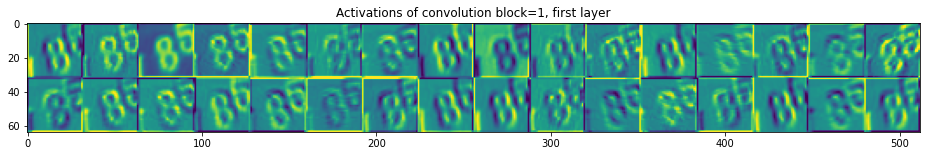

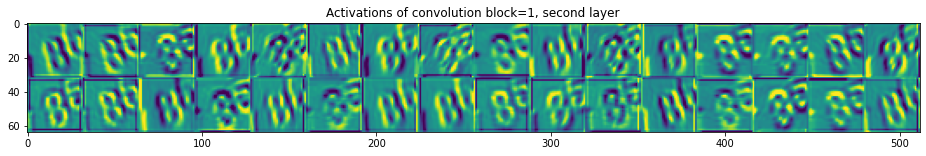

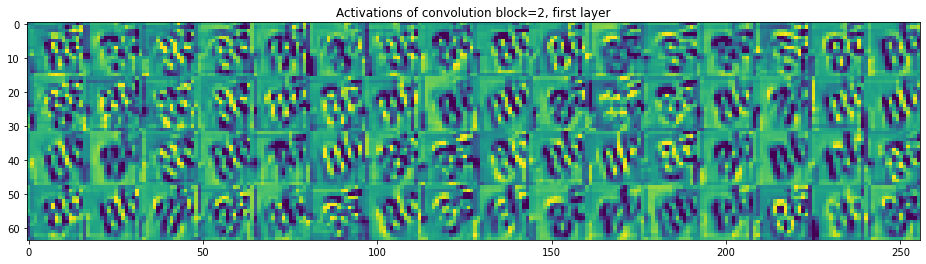

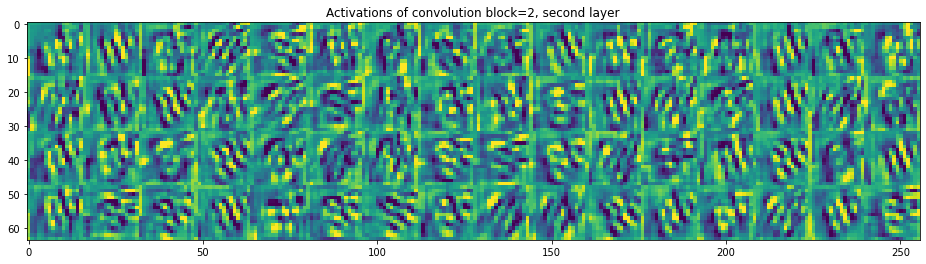

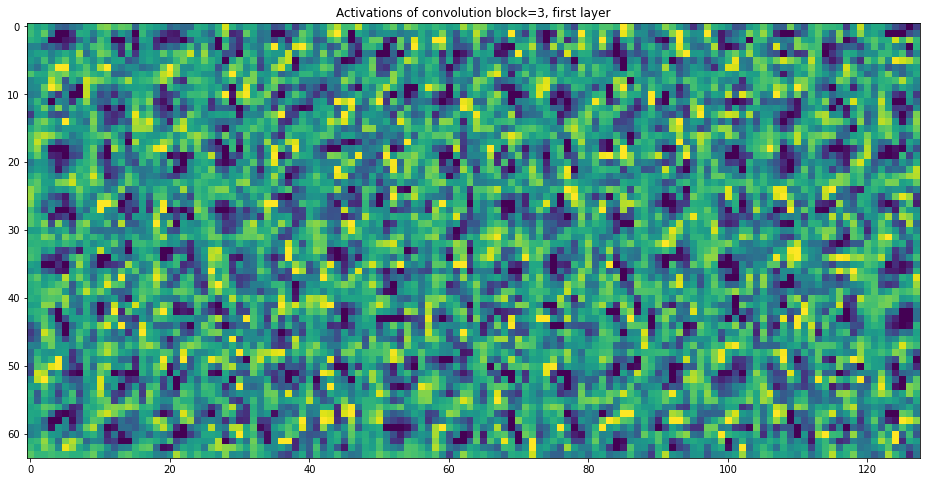

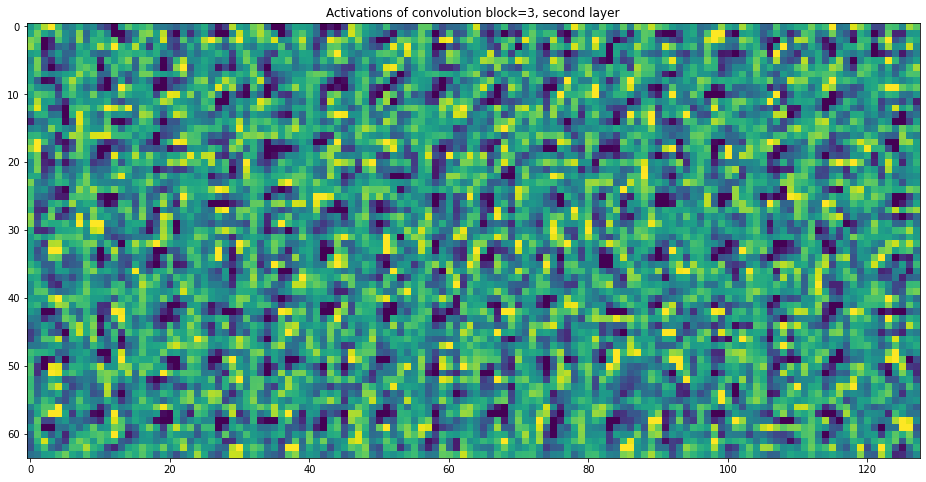

Answer is 481 characters long


In [34]:
images_per_row = 16

def plot_activations_for_layer(layer_name, layer_activation):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[
                col * size : (col + 1) * size, row * size : (row + 1) * size
            ] = channel_image
    scale = 1.0 / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(f"Activations of {layer_name}")
    plt.grid(False)
    plt.imshow(display_grid, aspect="auto", cmap="viridis")
    plt.show()


def plot_activations(img_tensor=X_test[0], layers=None):
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor = rgb2gray(img_tensor)
    if layers is None:
        layers = range(conv_blocks - 1)
    model = load_model_from_file(base_dir, "model_2_2")
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)
    for i in layers:
        plot_activations_for_layer(f"convolution block={i + 1}, first layer", activations[i * 8])
        plot_activations_for_layer(f"convolution block={i + 1}, second layer", activations[i * 8 + 3])

        

plot_activations()
answer_q_3_2 = """
As always, the first convolutional layers focus on the local patterns, they are nearly edge detectors which could be noted by looking how they activate at edges.
The second block seems to focus more on the structure of the number '8', it pays more attention to the symmetry and that the number '8' is composed of two circles.
However, The third and foruth blocks are too abstract and nothing intutive could be drawn from them(the fourth block is just omitted due to this reason).
"""
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

It is clear that the classifier is paying attention to the important region to identify the number(the center of the number '8').


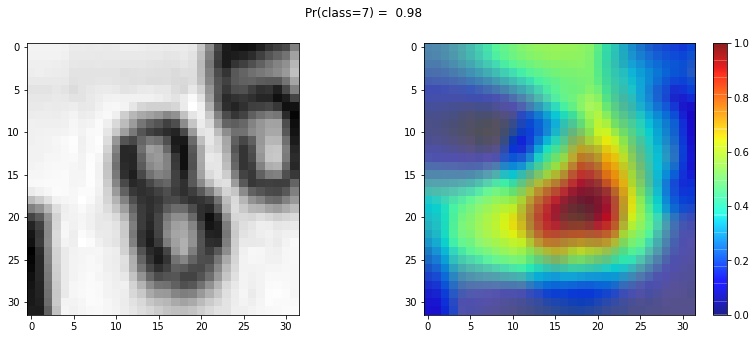

In [35]:
# inspired from https://fairyonice.github.io/Grad-CAM-with-keras-vis.html

from vis.visualization import visualize_cam
import matplotlib.pyplot as plt

def plot_activation_map(img, class_index, probs, grads):
    img = np.squeeze(img)
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    axes[0].imshow(img, cmap="gray")
    axes[1].imshow(img)
    i = axes[1].imshow(grads, cmap="jet", alpha=0.65)
    fig.colorbar(i)
    plt.suptitle("Pr(class={}) = {:5.2f}".format(class_index, probs[class_index]))


def plot_3_3(index=0):
    seed_input, class_index = X_test[index], np.argmax(y_test[index])
    seed_input = np.expand_dims(seed_input, axis=0)
    seed_input = rgb2gray(seed_input)
    model = load_model_from_file(base_dir, "model_2_2")
    predicted = model.predict(seed_input)
    predicted = predicted[0]
    last_conv_index = conv_blocks * 8 - 5
    grads = visualize_cam(
        model,
        -1,
        class_index,
        seed_input,
        penultimate_layer_idx=last_conv_index,
        backprop_modifier=None,
        grad_modifier=None,
    )
    plot_activation_map(seed_input, class_index, predicted, grads)


plot_3_3()
print("It is clear that the classifier is paying attention to the important region to identify the number(the center of the number '8').")

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

In [36]:
from keras_lr_finder import LRFinder
from tensorflow.keras import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten


def build_model_4_1(initial_lr=4e-4, size=512, train_last=None):
    model = Sequential()
    base_model = VGG16(include_top=False, input_shape=(32, 32, 3), weights="imagenet")
    for layer in base_model.layers:
        layer.trainable = False
    if train_last is not None:
        for layer in base_model.layers[-train_last:]:
            layer.trainable = True
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(size, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(size, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))
    opt = Nadam(learning_rate=initial_lr, beta_1=0.9, beta_2=0.999)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    return model

Loading model from file
Success!
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_26 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_184 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_87 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_185 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_88 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_186 (Dense)   

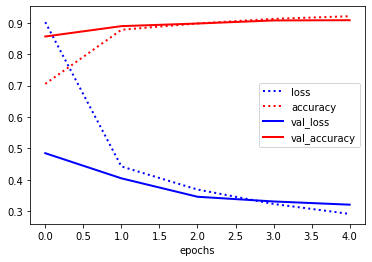

In [37]:
run_evaluation(
    "model_4_1",
    build_model_4_1,
    evaluation_split,
    base_dir,
    train=True,
    epochs=5,
    batch_size=32,
    size=256,
    # unfreeze the last conv block
    train_last=8,
    initial_lr=4e-4,
)
answer_q_4_1 = """
Unfreezing the last few convolutional layers greatly increased the accuracy of the model by more than 20%, after some fine-tuning the accuracy of this model
was about 91%, it might be the case that the image net dataset is quite different from our dataset so one might need to unfreeze more layers to adapt them to our dataset
(the learning rate was chosen using the same method used before and we will use early stopping again to regularize the model, we also have resources constraints so
using a large number of epochs was not possible).
"""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [38]:
import gzip
import pickle

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential


def store_embedding(X, name):
    with gzip.open(os.path.join(base_dir, name + "_embedding.p"), "wb") as file_pi:
        pickle.dump(X, file_pi)


def load_embedding(name):
    with gzip.open(os.path.join(base_dir, name + "_embedding.p"), "rb") as file_pi:
        return pickle.load(file_pi)


def store_embeddings():
    """ Stores all necessary embeddings to file
  """
    model = load_model_from_file(base_dir, "model_4_1")
    conv_net = Sequential(model.layers[:2])
    train_features = conv_net.predict(X_train)
    store_embedding(train_features, "train")
    val_features = conv_net.predict(X_val)
    store_embedding(val_features, "val")
    test_features = conv_net.predict(X_test)
    store_embedding(test_features, "test")


def generate_pipeline():
    """ Returns an sklearn pipeline.
  """
    pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("classifier", RandomForestClassifier(n_jobs=-1)),
        ]
    )
    return pipeline


def evaluate_pipeline(pipeline, X_train, y_train, X_val, y_val, X_test, y_test):
    """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
    X = np.concatenate((X_train, X_val))
    y = np.concatenate((y_train, y_val))
    split_index = np.full(X.shape[0], 0)
    split_index[X_val.shape[0] :] = -1
    pds = PredefinedSplit(test_fold=split_index)
    params = {
        "classifier__n_estimators": [300, 600, 1000],
        "classifier__max_features": ["auto", "sqrt", "log2"],
        "classifier__max_depth": [5, 6, 7],
        "classifier__n_jobs": [-1],
    }
    grid = GridSearchCV(pipeline, params, cv=pds, scoring="accuracy", n_jobs=-1)
    print("begin evaluating...")
    grid.fit(X, y)
    estimator = grid.best_estimator_
    accuracy = estimator.score(X_test, y_test)
    return accuracy


def evaluation_4_2(X_train_emb, y_train_emb, X_test_emb, y_test_emb):
    """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
    X_val_emb = load_embedding("val")
    y_val_emb = np.argmax(y_val, axis=1)
    pipeline = generate_pipeline()
    return evaluate_pipeline(pipeline, X_train_emb, y_train_emb, X_val_emb, y_val_emb, X_test_emb, y_test_emb)


result = 0

# store_embeddings()
# it takes a long time to compute the accuracy due to using grid search, I will put the final result here and one could recompute it he wants
precomputed = True
X_train_emb = load_embedding("train")
X_test_emb = load_embedding("test")
y_train_emb = np.argmax(y_train, axis=1)
y_test_emb = np.argmax(y_test, axis=1)

if precomputed:
    result = 0.9124785980461275
else:  
    result = evaluation_4_2(X_train_emb, y_train_emb, X_test_emb, y_test_emb)
print(f"accuracy={result}")


answer_q_4_2 = f"""
Using the unfreezed model yields a better accuracy for the random forest classifier, so although as discussed in the forum it is not always the case that unfreezing
the last convolutional layers yields a better embedding, it was the case in this assignment and it is not far-fetched, we adapted the embedding to our specific dataset. 
Lastly, the resulting accuracy was {result} which is less than the best model(95%) but still very good. However, no extensive fine-tuning was done here
(due to resources constraints again) so it might be the case that we could obtain a comparable performance if we carefully fine-tune everything.
"""
print("Pipeline:", generate_pipeline())
print(answer_q_4_2)
print("Answer is {} characters long".format(len(answer_q_4_2)))

accuracy=0.9124785980461275
Pipeline: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
  

# References

1. https://openreview.net/pdf?id=B1Yy1BxCZ
2. https://arxiv.org/abs/1710.05941
3. https://arxiv.org/abs/1506.01186
4. https://arxiv.org/abs/1502.01852
5. https://paperswithcode.com/sota/image-classification-on-svhn